<a href="https://colab.research.google.com/github/Nikhila1215/Dementia-Prediction-using-ML/blob/main/Dementia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classification Report:
               precision    recall  f1-score   support

   Converted       0.25      0.25      0.25         8
    Demented       0.86      0.91      0.89        34
 Nondemented       0.98      0.95      0.97        65

    accuracy                           0.89       107
   macro avg       0.70      0.71      0.70       107
weighted avg       0.89      0.89      0.89       107

Confusion Matrix:
 [[ 2  5  1]
 [ 3 31  0]
 [ 3  0 62]]
Accuracy: 0.8878504672897196
Precision: 0.8901498294021658
Recall: 0.8878504672897196
F1 Score: 0.8886265020026702
Cross-validation scores: [0.8        0.8        0.84       0.8        0.8        0.84
 0.84       0.79166667 0.91666667 0.79166667]
Average cross-validation score: 0.8220000000000001


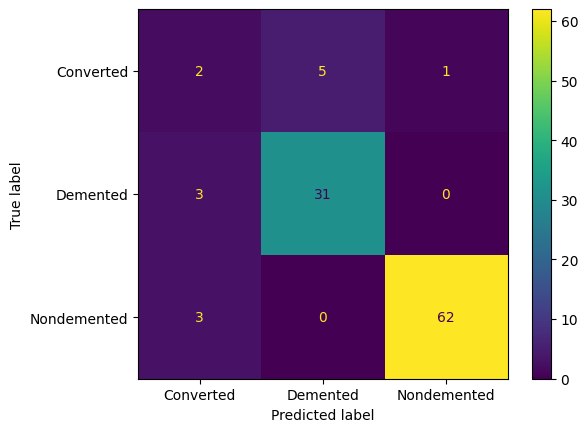

In [ ]:
#Decision Tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")


# Remove rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

   Converted       1.00      0.12      0.22         8
    Demented       0.85      1.00      0.92        34
 Nondemented       0.98      1.00      0.99        65

    accuracy                           0.93       107
   macro avg       0.94      0.71      0.71       107
weighted avg       0.94      0.93      0.91       107

Confusion Matrix:
 [[ 1  6  1]
 [ 0 34  0]
 [ 0  0 65]]
Accuracy: 0.9345794392523364
Precision: 0.9431322571509486
Recall: 0.9345794392523364
F1 Score: 0.9114470823823753
Cross-validation scores: [0.92       0.88       0.92       0.92       0.92       0.84
 0.88       0.95833333 0.875      0.91666667]
Average cross-validation score: 0.9029999999999999


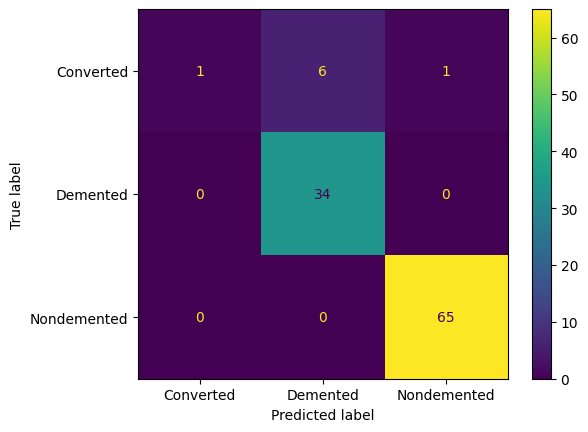

In [ ]:
#Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Remove rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

   Converted       1.00      0.50      0.67         8
    Demented       0.92      1.00      0.96        34
 Nondemented       0.98      1.00      0.99        65

    accuracy                           0.96       107
   macro avg       0.97      0.83      0.87       107
weighted avg       0.97      0.96      0.96       107

Confusion Matrix:
 [[ 4  3  1]
 [ 0 34  0]
 [ 0  0 65]]
Accuracy: 0.9626168224299065
Precision: 0.9650317267139698
Recall: 0.9626168224299065
F1 Score: 0.9570143028870711
Cross-validation scores: [0.84       0.92       0.92       0.88       0.92       0.96
 0.84       0.91666667 0.875      0.91666667]
Average cross-validation score: 0.8988333333333334


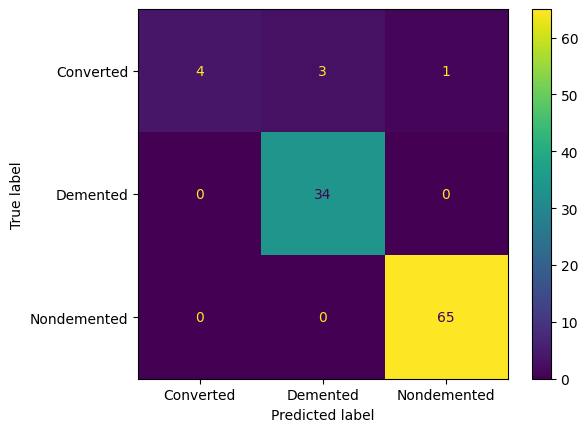

In [ ]:
#Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Remove rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

   Converted       1.00      0.50      0.67         8
    Demented       0.92      1.00      0.96        34
 Nondemented       0.98      1.00      0.99        65

    accuracy                           0.96       107
   macro avg       0.97      0.83      0.87       107
weighted avg       0.97      0.96      0.96       107

Confusion Matrix:
 [[ 4  3  1]
 [ 0 34  0]
 [ 0  0 65]]
Accuracy: 0.9626168224299065
Precision: 0.9650317267139698
Recall: 0.9626168224299065
F1 Score: 0.9570143028870711
Cross-validation scores: [0.84       0.84       0.92       0.88       0.92       0.88
 0.84       0.91666667 0.91666667 0.91666667]
Average cross-validation score: 0.8870000000000001


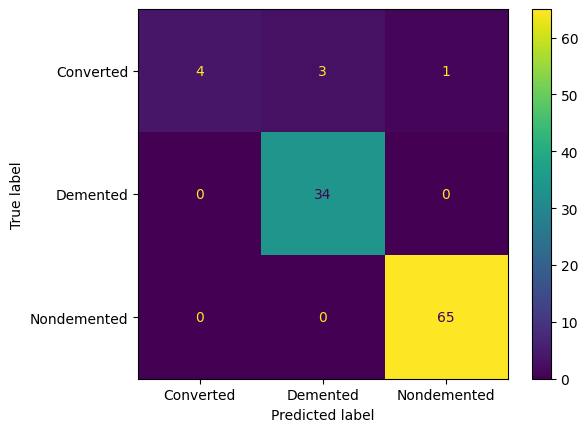

In [ ]:
#SVM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Remove rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
 [[ 5  2  1]
 [ 1 33  0]
 [ 1  0 64]]
Accuracy: 0.9532710280373832
Precision: 0.9511348464619492
Recall: 0.9532710280373832
F1 Score: 0.9519165650819451


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.88       0.84       0.92       0.88       0.92       0.88
 0.84       0.91666667 0.875      0.91666667]
Average cross-validation score: 0.8868333333333333


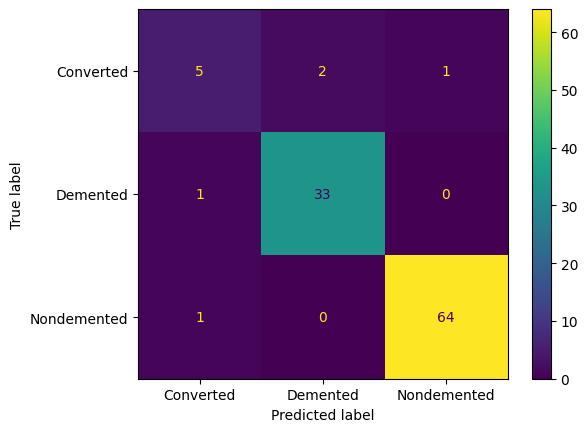

In [ ]:
#MLp Classifier***
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
data =  pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Drop rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])

# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

   Converted       0.50      0.67      0.57         6
    Demented       0.95      0.91      0.93        22
 Nondemented       0.98      0.95      0.96        43

    accuracy                           0.92        71
   macro avg       0.81      0.84      0.82        71
weighted avg       0.93      0.92      0.92        71

Confusion Matrix:
 [[ 4  1  1]
 [ 2 20  0]
 [ 2  0 41]]
Accuracy: 0.9154929577464789
Precision: 0.9285714285714286
Recall: 0.9154929577464789
F1 Score: 0.9207893049129251
Cross-validation scores: [0.89655172 0.89655172 0.86206897 0.85714286 0.85714286 0.92857143
 0.89285714 0.85714286 0.89285714 0.89285714]
Average cross-validation score: 0.8833743842364532


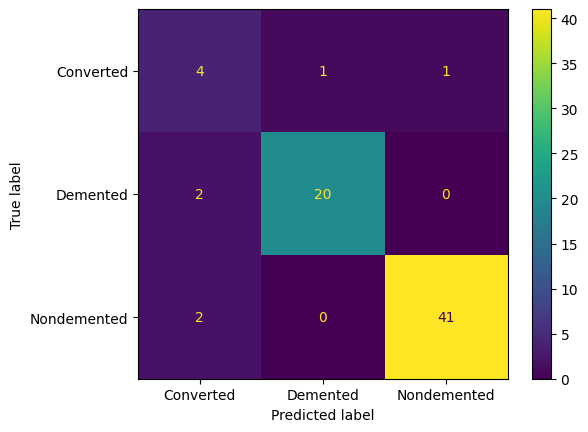

In [ ]:
#Naive Bayes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Remove rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
 [[ 5  2  1]
 [ 1 33  0]
 [ 1  0 64]]
Accuracy: 0.9532710280373832
Precision: 0.9511348464619492
Recall: 0.9532710280373832
F1 Score: 0.9519165650819451
Cross-validation scores: [0.48       0.52       0.4        0.48       0.92       0.64
 0.8        0.66666667 0.58333333 0.66666667]
Average cross-validation score: 0.6156666666666666


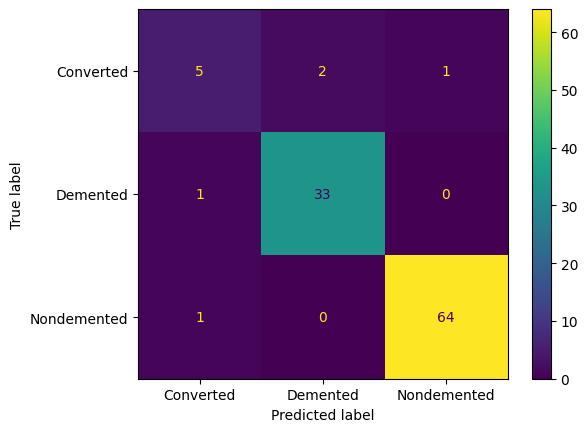

In [ ]:
#SVM and MLP ***
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")


# Drop rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])

# Features and target variable
X = data[feature_cols]
y = data['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build SVM classifier with C=2
svm_clf = SVC(kernel='linear', C=2, probability=True)

# Build MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('mlp', mlp_clf)])

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Predictions from the voting classifier
ensemble_pred = voting_clf.predict(X_test_scaled)

# Calculate evaluation metrics for ensemble model
accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred, average='weighted')
recall = recall_score(y_test, ensemble_pred, average='weighted')
f1 = f1_score(y_test, ensemble_pred, average='weighted')

# Confusion matrix for ensemble model
conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Output the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)

# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, ensemble_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

   Converted       1.00      0.62      0.77         8
    Demented       0.94      1.00      0.97        34
 Nondemented       0.98      1.00      0.99        65

    accuracy                           0.97       107
   macro avg       0.98      0.88      0.91       107
weighted avg       0.97      0.97      0.97       107

Confusion Matrix:
 [[ 5  2  1]
 [ 0 34  0]
 [ 0  0 65]]
Accuracy: 0.9719626168224299
Precision: 0.9731426413669403
Recall: 0.9719626168224299
F1 Score: 0.9690302278159878
Cross-validation scores: [0.92       0.84       0.92       0.92       0.92       0.84
 0.88       0.95833333 0.91666667 0.95833333]
Average cross-validation score: 0.9073333333333334


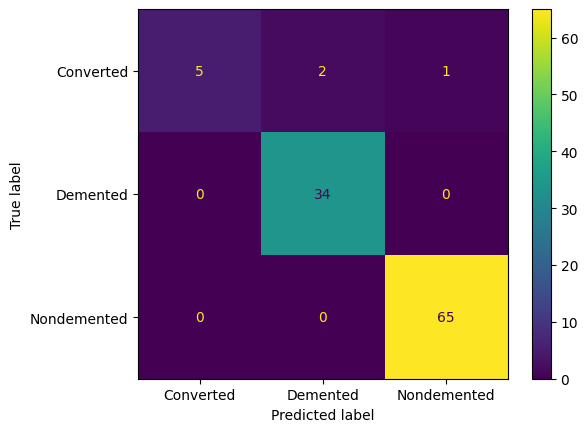

In [42]:
#SVM and Random Forest ****
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Drop rows with missing values
data.dropna(inplace=True)

# Define feature columns
feature_cols = ['M/F', 'Age', 'EDUC',  'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Encode the 'M/F' column
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])


# Features and target variable
X = data[feature_cols]
y = data['Group']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build SVM classifier
svm_clf = SVC(kernel='linear')

# Build Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create a Voting Classifier

svm_clf = SVC(kernel='linear')
rf_clf = RandomForestClassifier(random_state=42)
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf)], voting = 'hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions from the voting classifier
ensemble_pred = voting_clf.predict(X_test)


# Calculate evaluation metrics for ensemble model
accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred, average='weighted')
recall = recall_score(y_test, ensemble_pred, average='weighted')
f1 = f1_score(y_test, ensemble_pred, average='weighted')

# Classification report
class_report = classification_report(y_test, ensemble_pred)

# Confusion matrix for ensemble model
conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Output the results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation
scores = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train)
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, ensemble_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()


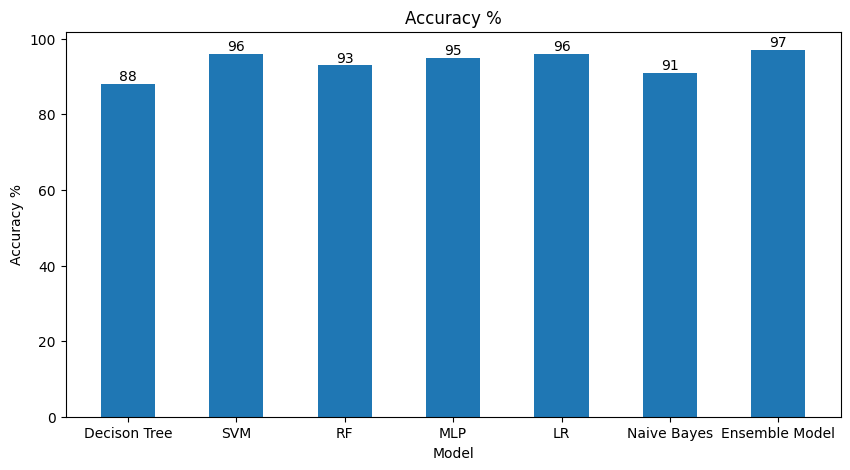

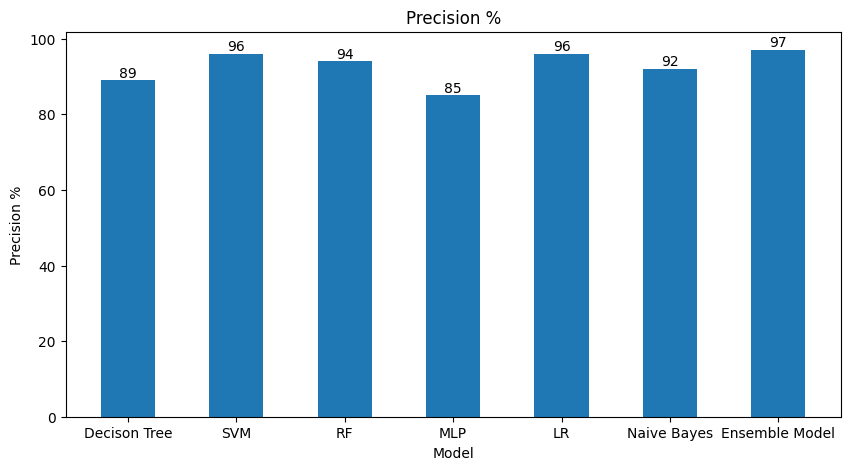

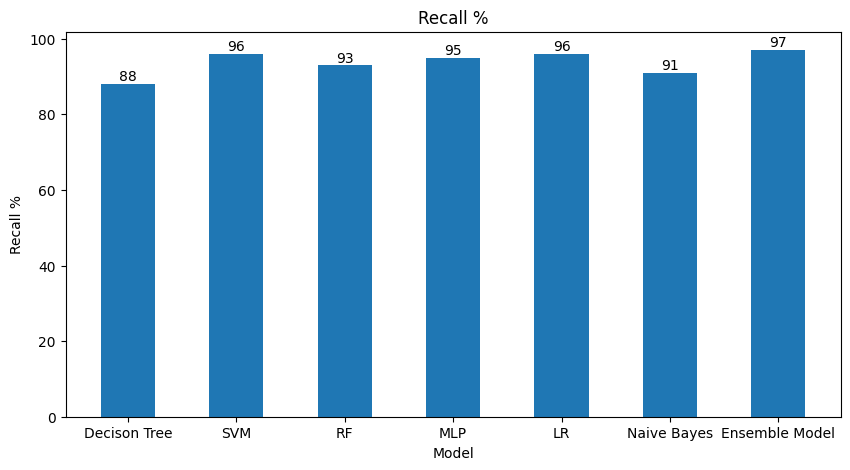

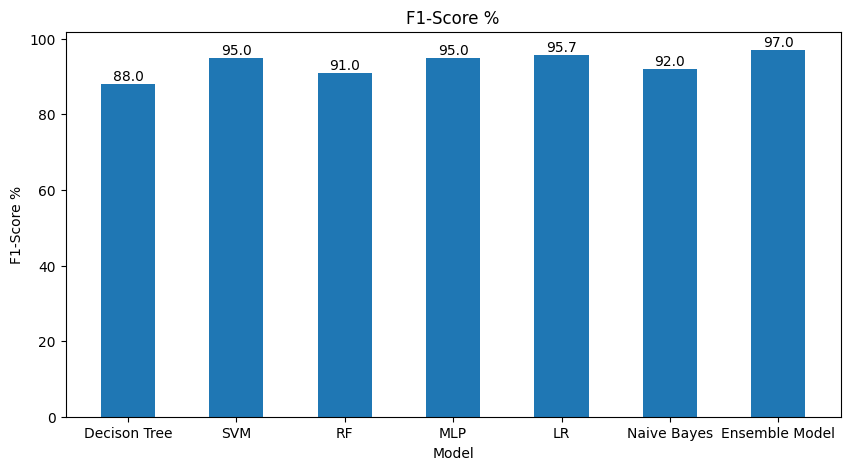

In [ ]:
#Performance Metrics Bar Graphs
import matplotlib.pyplot as plt

# Accuracy percentages for SVM and RF
accuracy = [88, 96, 93, 95, 96, 91, 97]
precision = [89,96, 94, 85, 96,92, 97]
recall = [88, 96, 93, 95, 96, 91, 97]
f1=[88,95,91,95, 95.7, 92, 97]

# Corresponding model names
models = ['Decison Tree', 'SVM', 'RF', 'MLP', 'LR', 'Naive Bayes', 'Ensemble Model']

metrics = [accuracy, precision, recall, f1]
titles = ['Accuracy %', 'Precision %', 'Recall %', 'F1-Score %']

for metric, title in zip(metrics, titles):
    fig = plt.figure(figsize=(10, 5))

    # Create the bar graph
    bars = plt.bar(models, metric, 0.5)

    # Add a title and labels
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel(title)

    # Add count annotations to the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    # Display the graph
    plt.show()

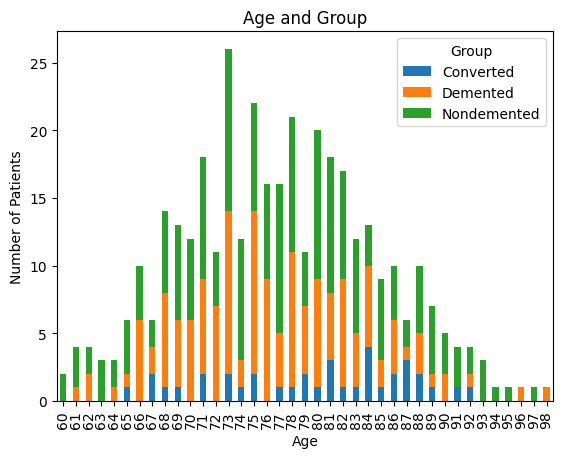

In [ ]:
#Age and Group - number of patients
import matplotlib.pyplot as plt
import pandas as pd

#Load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Prepare data: count number of demented and non-demented patients in each age
age_counts = df.groupby(['Age', 'Group']).size().unstack()


# Create the bar graph
age_counts.plot(kind='bar', stacked=True)

# Add a title and labels
plt.title('Age and Group')
plt.xlabel('Age')
plt.ylabel('Number of Patients')


# Display the graph
plt.show()

M/F
F    213
M    160
Name: count, dtype: int64


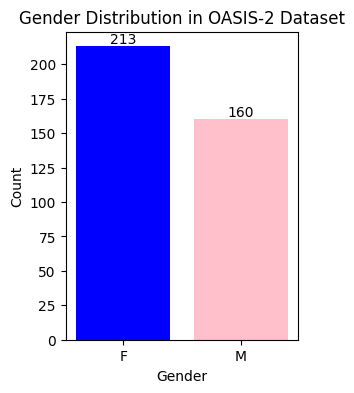

In [ ]:
#Male and Female
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Count the number of males and females
gender_counts = df['M/F'].value_counts()

print(gender_counts)

# Create a bar graph
plt.figure(figsize=(3,4))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in OASIS-2 Dataset')

# Add count annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.show()

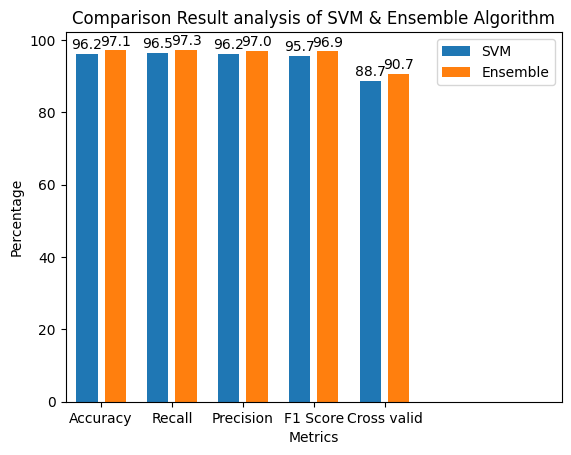

In [ ]:
#Comparison Result analysis of SVM & Ensemble Algorithm
import matplotlib.pyplot as plt
import numpy as np

# Metrics for SVM and RF
svm_metrics = [96.2, 96.5, 96.2, 95.7, 88.7]
ensemble_metrics = [97.1, 97.3, 97, 96.9, 90.7]

# Corresponding metric names
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Cross valid']

# Arrange on the x-axis
x = np.arange(len(metrics))

# Create the bar graph
bars_svm = plt.bar(x - 0.2, svm_metrics, 0.3, label='SVM')
bars_ensemble = plt.bar(x + 0.2, ensemble_metrics, 0.3, label='Ensemble')

# Add a title and labels
plt.title('Comparison Result analysis of SVM & Ensemble Algorithm')
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.xticks(x, metrics)
plt.xlim([-0.5, 6.5])

# Add the values inside the bars
for svm, ensemble in zip(bars_svm, bars_ensemble):
    plt.text(svm.get_x() + svm.get_width() / 2, svm.get_height() + 0.5, str(svm.get_height()), ha='center', va='bottom')
    plt.text(ensemble.get_x() + ensemble.get_width() / 2, ensemble.get_height() + 0.5, str(ensemble.get_height()), ha='center', va='bottom')

# Add a legend
plt.legend()

# Display the graph
plt.show()

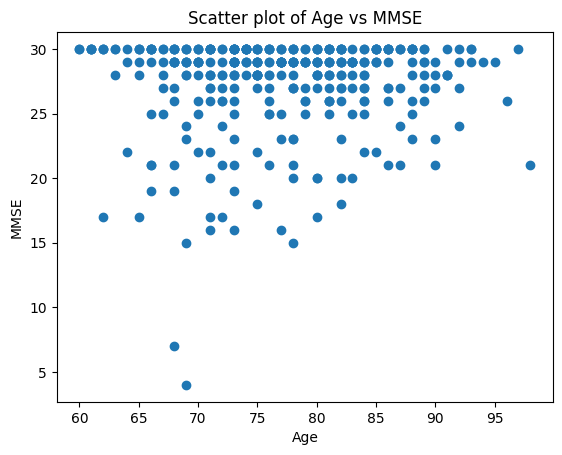

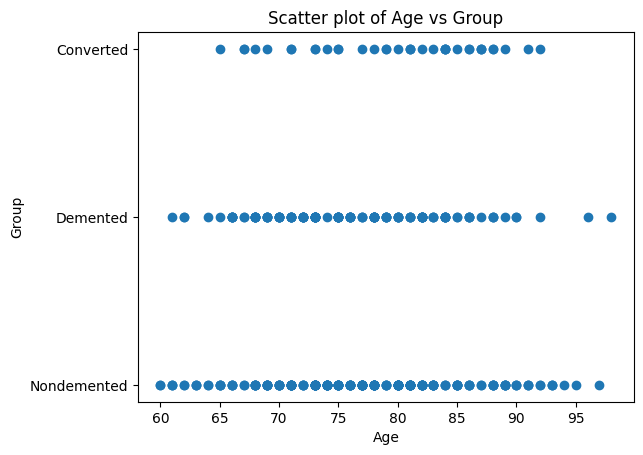

In [52]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has been loaded properly
feature_cols = ['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Replace 'feature1' and 'feature2' with the features you want to plot
feature1 = 'Age'
feature2 = 'MMSE'
feature3 = 'Group'

plt.scatter(data[feature1], data[feature2])
plt.title(f'Scatter plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

plt.scatter(data[feature1], data[feature3])
plt.title(f'Scatter plot of {feature1} vs {feature3}')
plt.xlabel(feature1)
plt.ylabel(feature3)
plt.show()

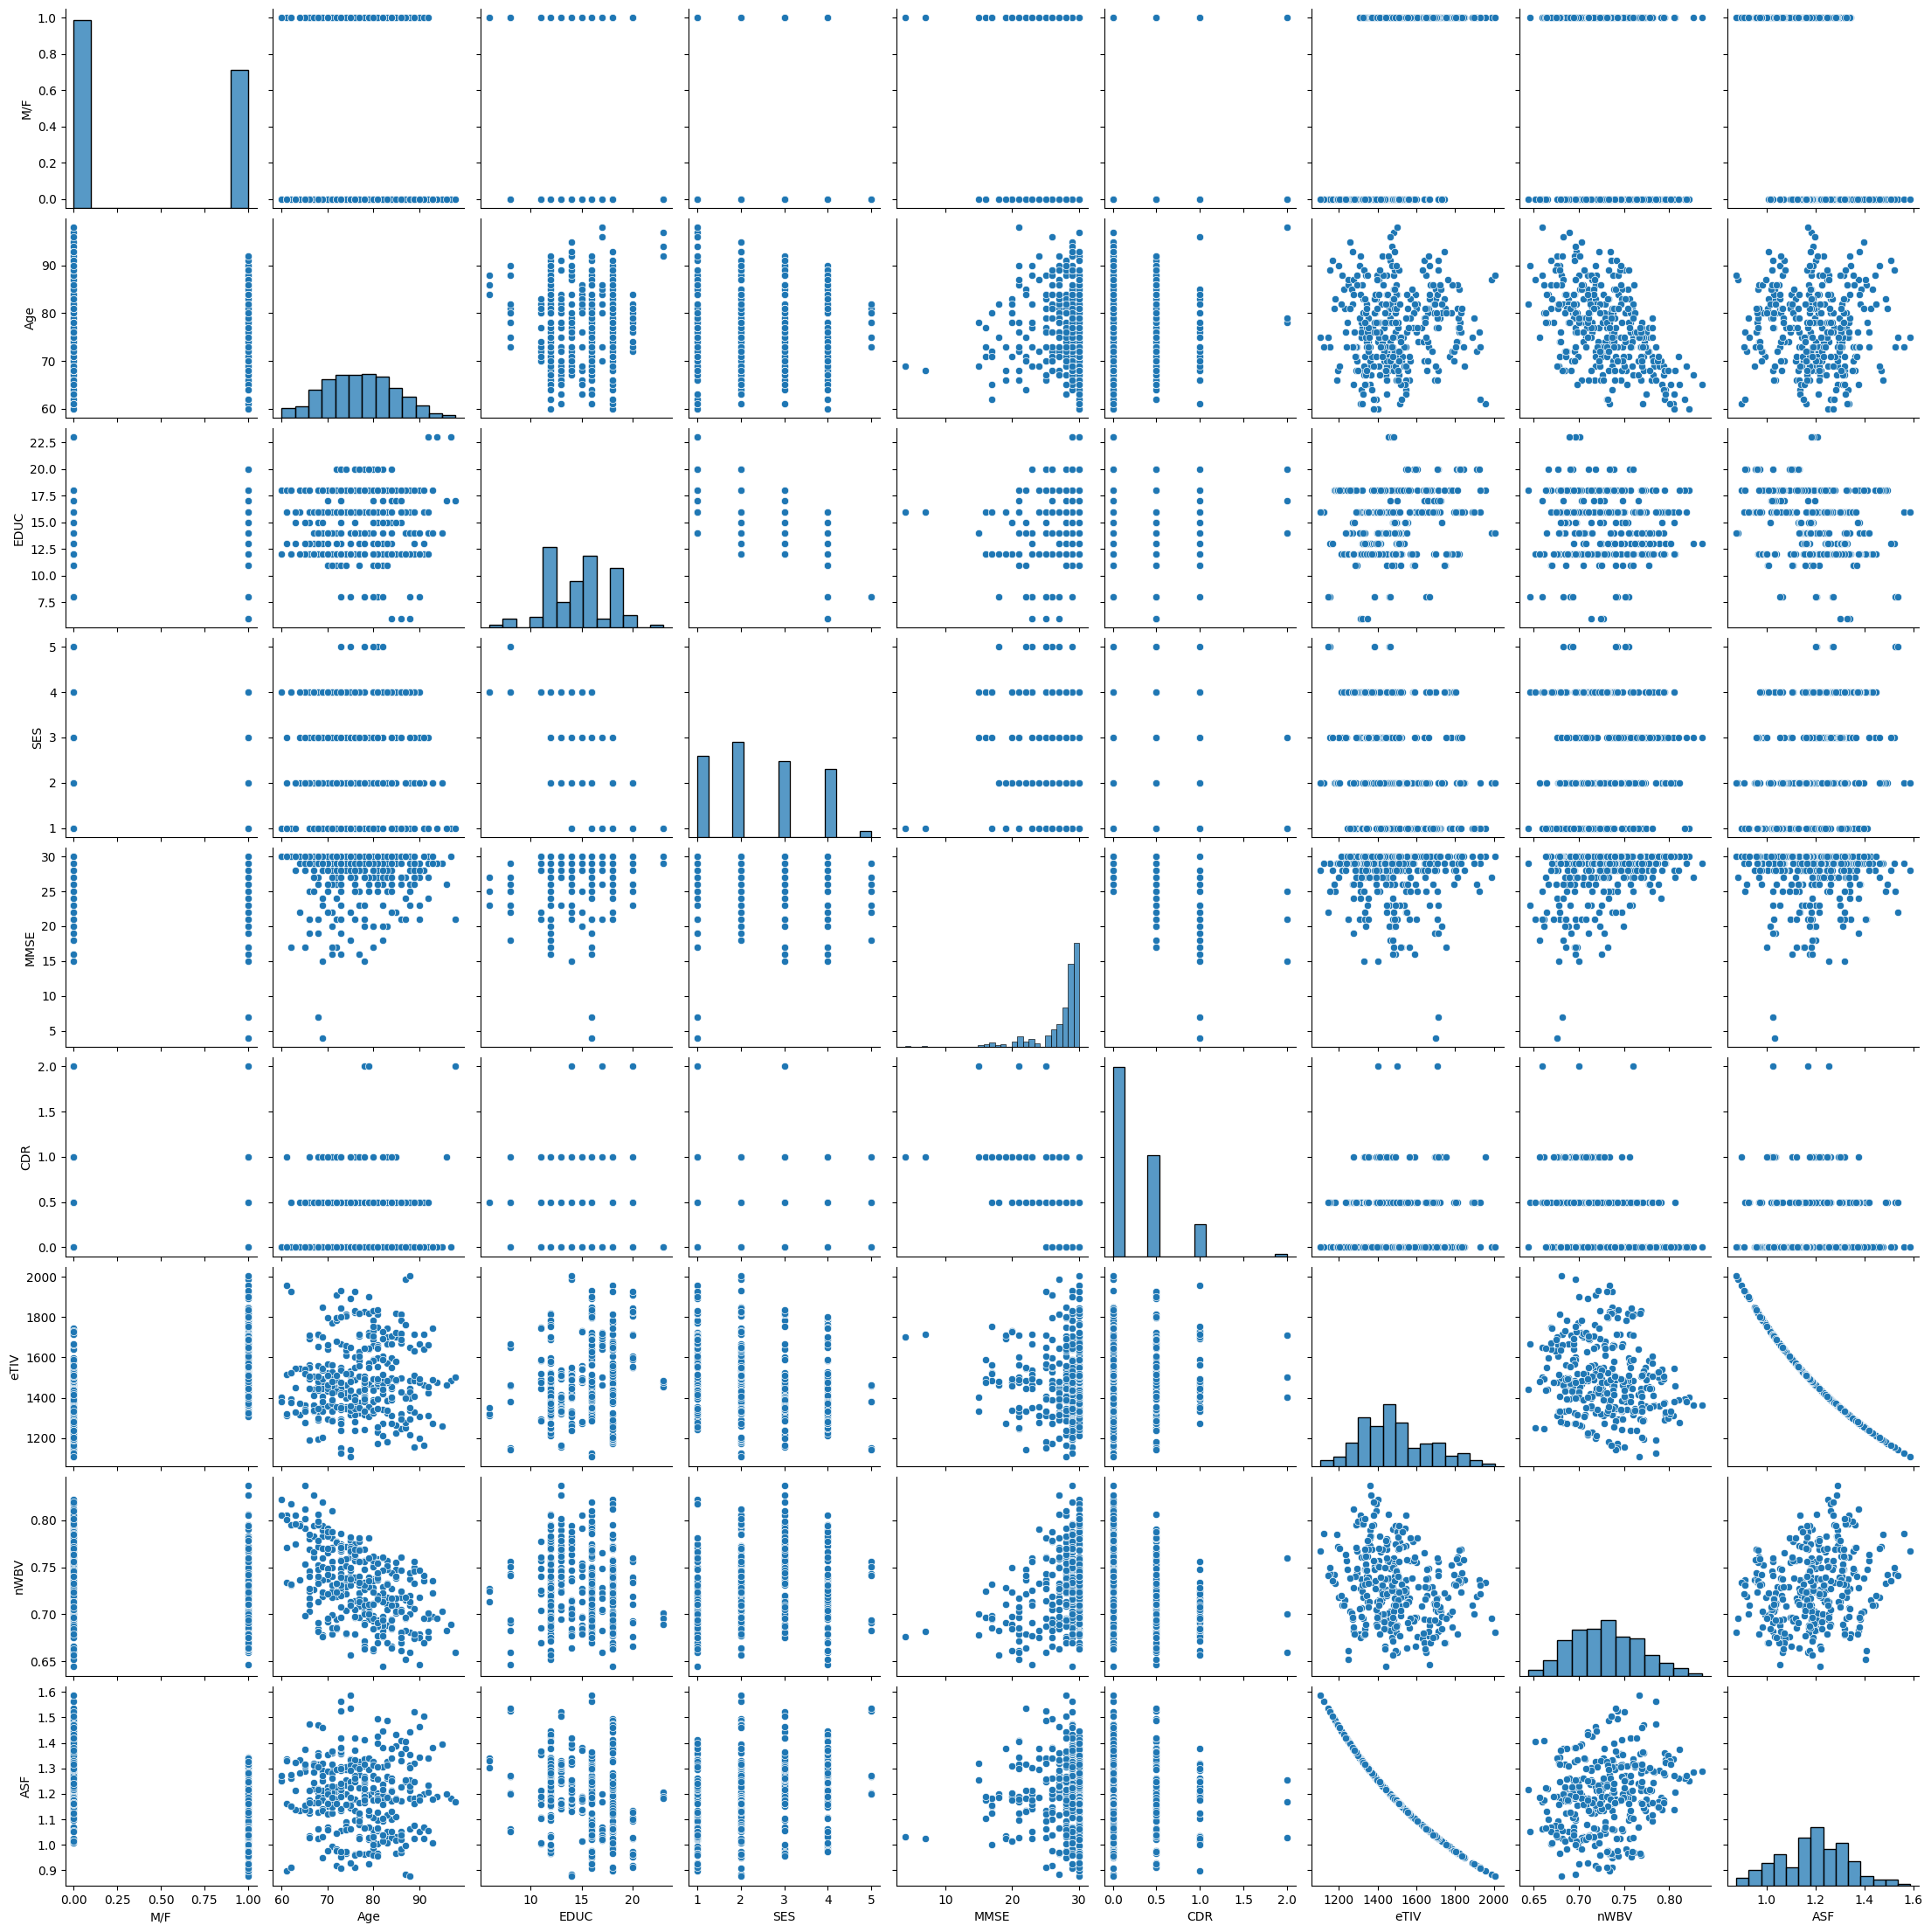

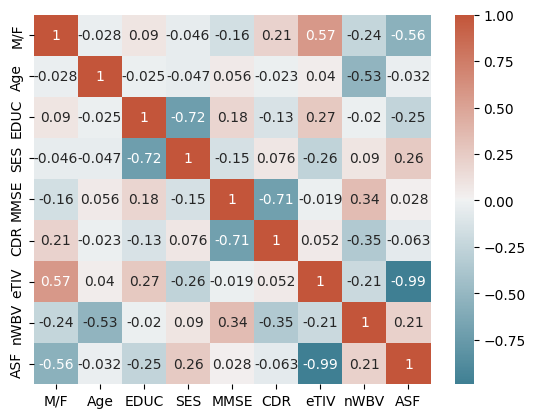

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/oasis_longitudinal_demographics.xlsx")

# Assuming 'data' is your DataFrame and it has been loaded properly
feature_cols = [ 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Pairplot
sns.pairplot(data[feature_cols])
plt.show()

# Correlation Matrix
corr = data[feature_cols].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()